In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

from ml_projects.posh.utils import data, fluorescence,microscope
from ml_projects.microscopy_common.utils import plate

In [2]:
plate_id = "PC2089"
channel_map = {"DAPI": 3, 
               "eGFP": 2,
               "mOrange": 1,
               "mKate": 0}

In [3]:
## obtain the s3 database
plates = data.get_nikon_plates()
#List the measurements associated with the uuid
## plates[(plates.plate_id == plate_id)].sort_values(by=['acquisition_time'])
## Obtain the most recent acquisition 
measurement_id = plates[(plates.plate_id == plate_id)].sort_values(by=['acquisition_time'],ascending=False).iloc[1]["uuid"]

In [4]:
acquisition_df = data.create_acquisition_dataframe(measurement_id)

INFO:root:Selected Acquisition Folders: 
 ['nikon3/Nikon_Confocal_DB2 Projects/PC2089/trainbow_20Xwf/20220815_133506_641']


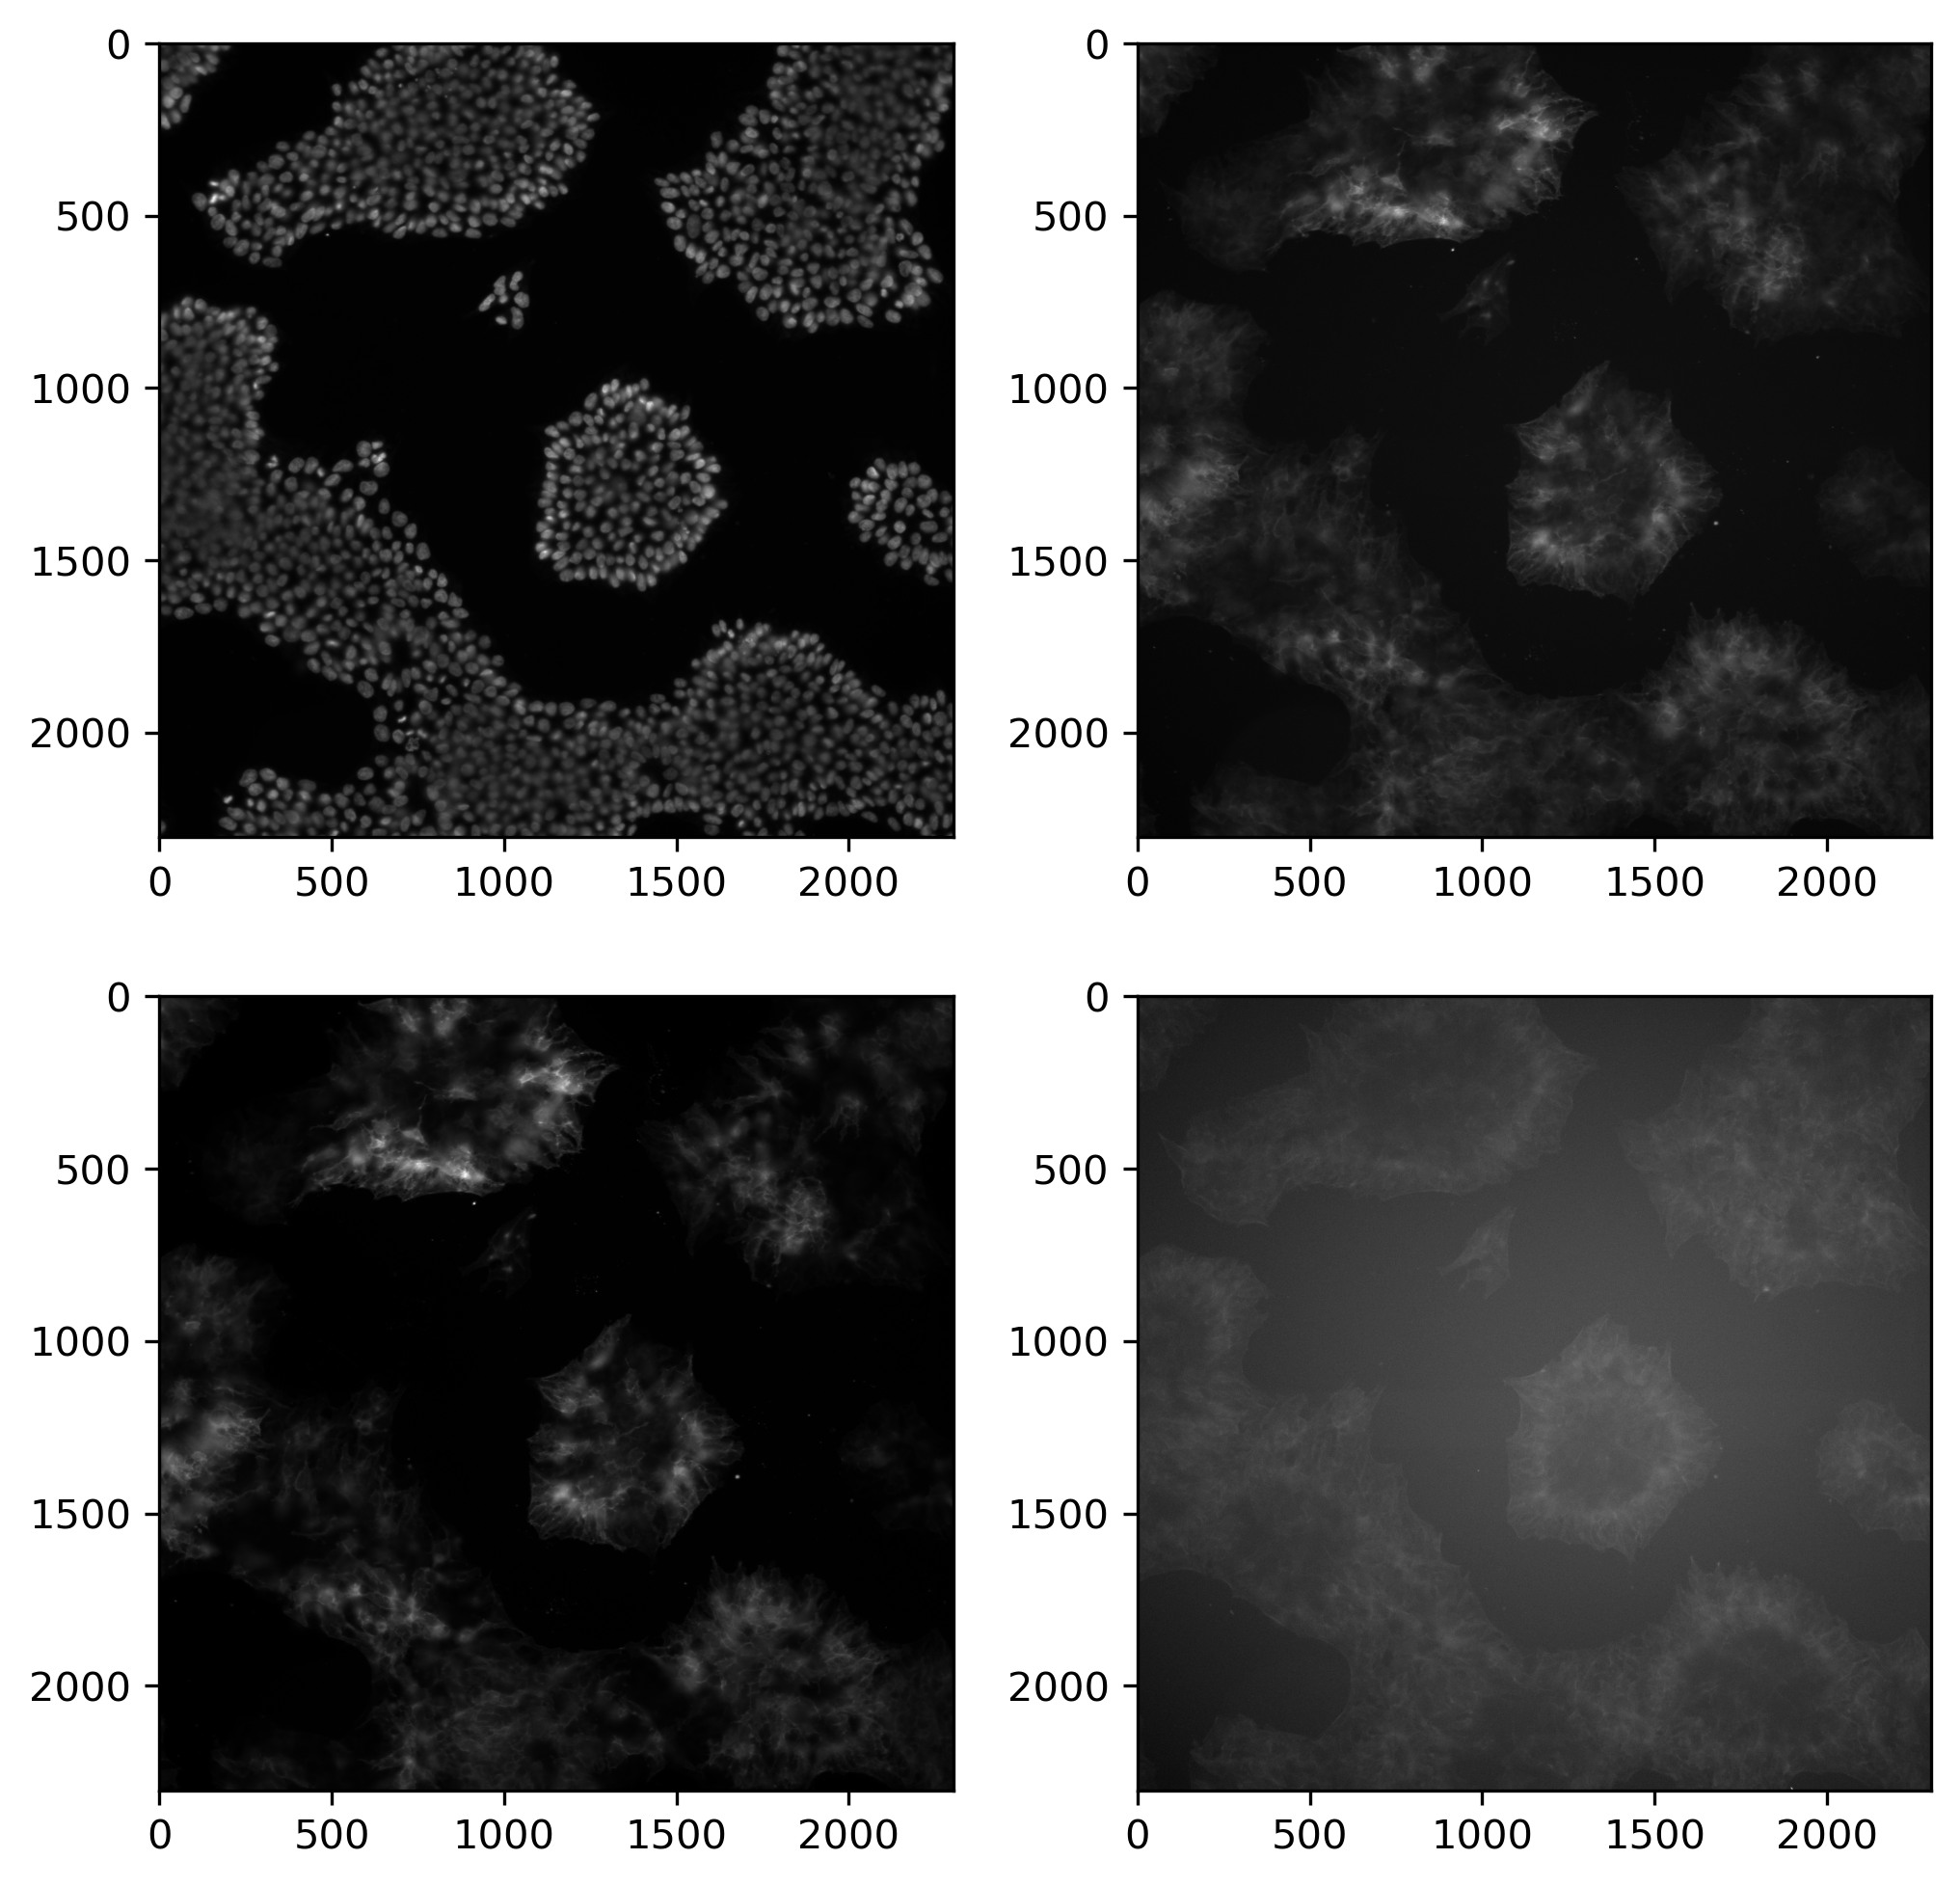

In [5]:
# For each condition 
random_image_uid = np.random.choice(acquisition_df[acquisition_df.well_loc == 'A01' ].uid.drop_duplicates())

random_image = data.read_image(acquisition_df[acquisition_df.uid==random_image_uid].path.iloc[0])
fig = plt.figure(figsize=(8, 8),dpi=300)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(random_image[channel_map['DAPI']],cmap ="gray")
ax2.imshow(random_image[channel_map['eGFP']],cmap ="gray")
ax3.imshow(random_image[channel_map['mOrange']],cmap ="gray")
ax4.imshow(random_image[channel_map['mKate']],cmap ="gray")


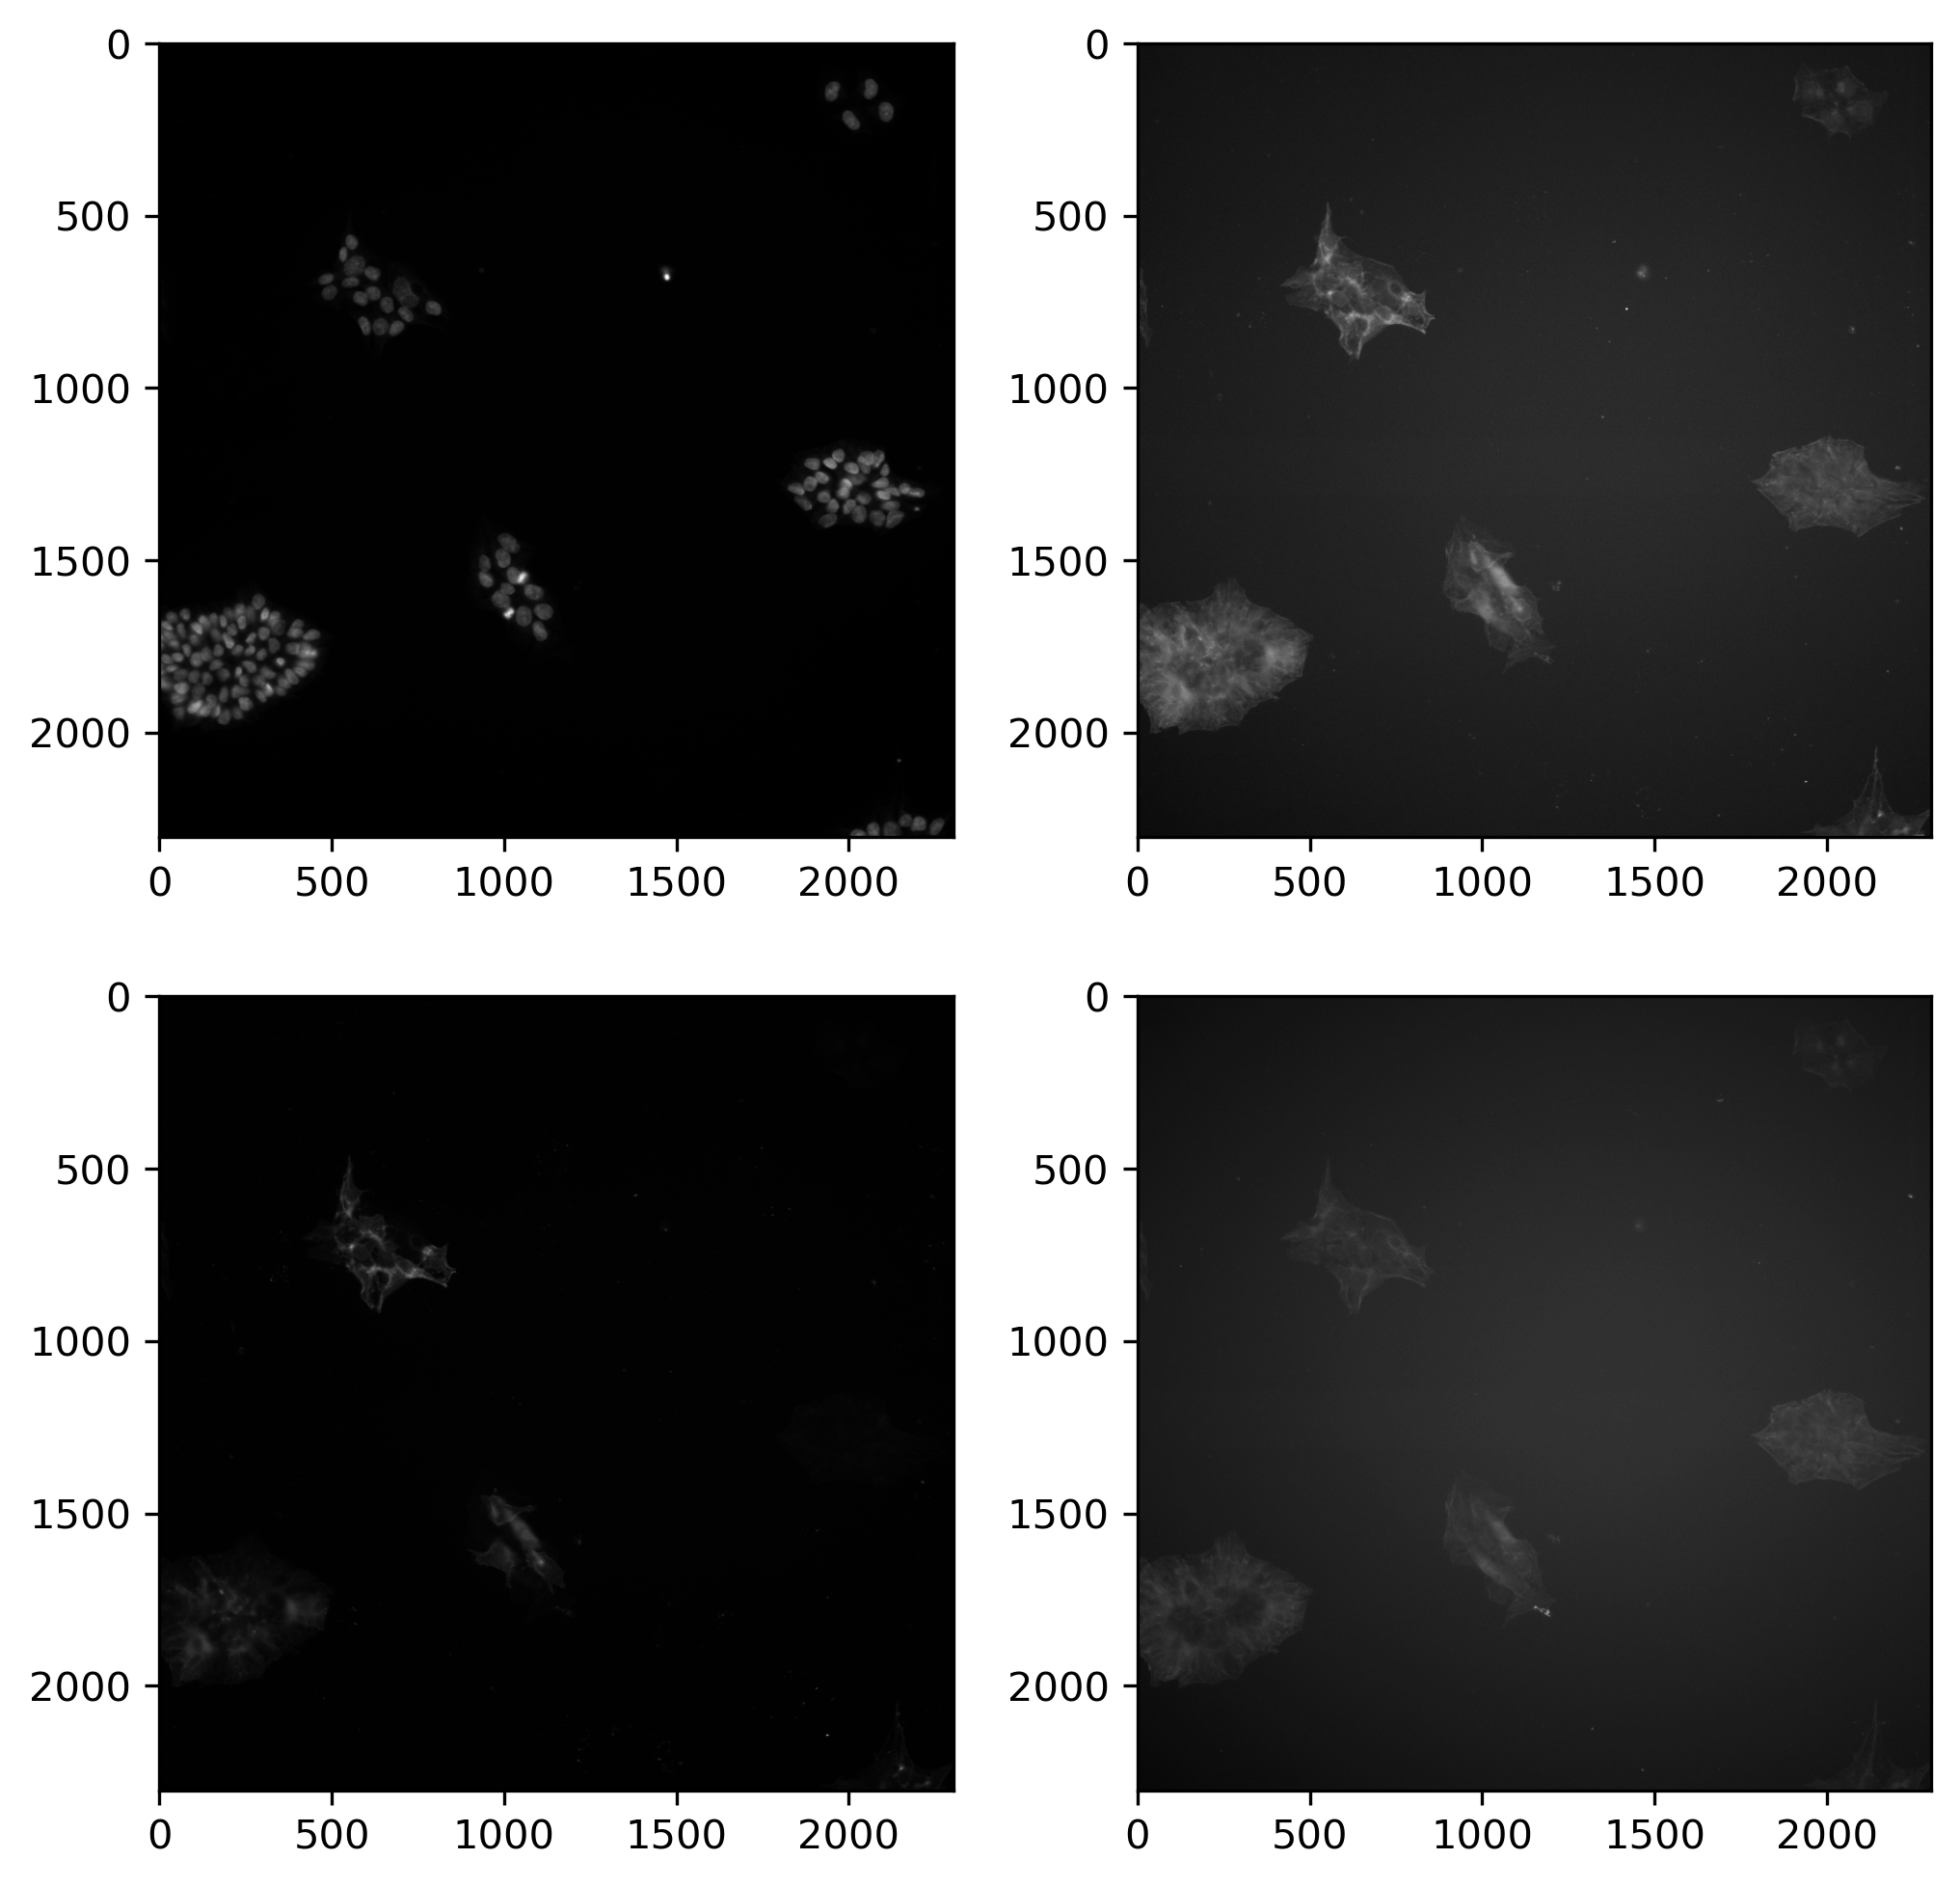

In [6]:
# For each condition 
random_image_uid = np.random.choice(acquisition_df[acquisition_df.well_loc == 'A03' ].uid.drop_duplicates())

random_image = data.read_image(acquisition_df[acquisition_df.uid==random_image_uid].path.iloc[0])
fig = plt.figure(figsize=(8, 8),dpi=300)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(random_image[channel_map['DAPI']],cmap ="gray")
ax2.imshow(random_image[channel_map['eGFP']],cmap ="gray")
ax3.imshow(random_image[channel_map['mOrange']],cmap ="gray")
ax4.imshow(random_image[channel_map['mKate']],cmap ="gray")


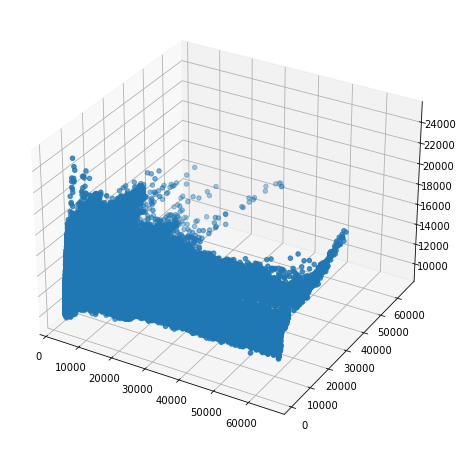

In [37]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(eGFP, morange, mKate)
plt.show()